<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Caso_05_Random_Forest_datos_temperturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Crear y evaluar e interpretar el modelo de regresión *random forest* o bosques aletorios con datos de temperatura.

# Marco conceptual

Un modelo de regresión *Random Forest* es un método de aprendizaje conjunto (*ensemble learning*) que opera construyendo múltiples árboles de decisión durante el entrenamiento y generando la predicción como el **promedio de las predicciones de los árboles individuales**.

Es una extensión del método de árboles de decisión y se utiliza para abordar problemas de regresión (y también de clasificación) proporcionando predicciones más precisas y estables.

La diferencia principal entre un modelo de regresión Random Forest y un árbol de regresión individual radica en la manera en que cada uno genera sus predicciones y en su rendimiento general:

* Árbol de regresión: Se construye un único árbol de decisión. El modelo aprende decisiones basándose en las características de los datos, dividiendo el conjunto de datos en subconjuntos más pequeños para llegar a una decisión final o predicción.

* Random Forest: Se construyen múltiples árboles de decisión, utilizando para cada uno una muestra aleatoria del conjunto de datos con reemplazo (*bootstrap sample*). Además, en cada división de un árbol, se selecciona un subconjunto aleatorio de características, lo que aumenta la diversidad entre los árboles y hace al modelo más robusto.

* En cuanto a rendimiento el algoritmo *Random Forest* suele ser de mejor rendimiento que el arbol de regresión pero más cmpleo en cuanto a la carga computacional.

Un árbol de regresión es un modelo más simple y directo, *Random Forest* utiliza la potencia de múltiples árboles para crear un modelo más robusto y preciso, aunque a costa de un mayor costo computacional.


# Contexto de los datos

Los datos se relacionan con distintaas variables atmosféricas que afecan a una temperatura de una región o localización geográfica.

## Las variables independientes:

* 1. Mes (mes): Afecta debido a las variaciones estacionales.
* 2. Día (dia): Puede influir ligeramente debido al cambio gradual de las temperaturas a lo largo del mes.
* 3. Velocidad del viento (velocidad_viento): Velocidades más altas pueden reducir la sensación térmica. km/hr
* 4. Presión atmosférica (presion_atmosferica): Cambios en la presión pueden indicar cambios en el clima. hpa
* 5. Humedad relativa (humedad_relativa): Afecta la sensación térmica y puede influir en la temperatura real.
* 6. Presencia de frentes fríos (frentes_frios): Un indicador binario (0 o 1) para la presencia de un frente frío.
* 7. Latitud (latitud): Afecta la temperatura promedio, con temperaturas generalmente disminuyendo al alejarse del ecuador.
* 8. Longitud (longitud): Puede tener un efecto indirecto, especialmente en grandes países donde el clima varía de costa a costa.
* 9. Altitud (altitud): La temperatura tiende a disminuir con la altitud debido a la baja densidad del aire y la disminución de la presión atmosférica.
* 10. Radiación Solar (radiacion_solar): La cantidad de radiación solar que llega a la superficie terrestre tiene un impacto directo en la temperatura. Esta variable puede variar según la cobertura de nubes, la hora del día y la época del año. 100 a 1000 W/m^2
* 11. Luminosidad o Insolación (luminosidad): Estrechamente relacionada con la radiación solar, se refiere a la cantidad de luz solar que llega a la Tierra. Afecta la temperatura especialmente durante las horas diurnas. Soleado obscuro de 0 a 100
* 12. Contaminación o Calidad del Aire (contaminacion): Partículas y gases en la atmósfera pueden atrapar el calor, contribuyendo al efecto invernadero y, por ende, a temperaturas más altas en áreas urbanas o industrializadas. Variables como el nivel de dióxido de carbono o la presencia de ozono cerca de la superficie pueden ser indicadores de contaminación. Niveles de 0 a 500, niveles altos son peligrosos.
* 13. Cobertura de Nubes (cobertura_nubes): La cantidad de nubes en el cielo puede influir en la temperatura al bloquear la radiación solar directa durante el día y atrapar el calor durante la noche. Porcentaje de 0 a 100%

## La variable dependiente

* Temperatura ambiental es la cantidad de grados centígrados promedio.

# Descripción

* Se cargan librerías
* Se cargan funciones
* Se cargan widgest
* Se cargan los datos
* Se observa un diagrama de serie de tiempo con als fechas y temperatuas promedio por mes
* Se observa un diagrama de correlación entre variables independientes.
* Se observan los datos los primero y ultimos 20 registros de conjunto de datos
* Se hacen datos de entrenamieto y datos de validación
* Se construye el modelo con los datos de entrenamiento
* Se hacen predicciones con los datos de validación
* Se evalúa el *r squared*
* Se evalúa el modelo con *RMSE root mean swuare error* que significa las predicciones que tanto se alejan de las realidades.
* Se interpreta el caso

## Métricas del modelo

* El modelo se acepta si el valor de *r squared* está por encima del 50%*.
* El valor de *RMSE* se comparará con otros modelos. Con el modelo de regresión múltiple visto en el Caso 03: https://colab.research.google.com/drive/1bV87TeRbxCEt1LrM565oQ6a84aSDPACF?usp=sharing

# Desarrollo



## Cargar librerías



In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display, HTML, clear_output


# Para árboles de regresión
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Para random Forest
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor, plot_tree # Para visualiar árbol
from sklearn.tree import export_text # Para reglas de asociación

from sklearn import metrics # Para determinar métricas.

# Para determinar estadísticos ...
import statsmodels.api as sm

## Cargar funciones


In [6]:
def f_ver_temperaturas (fechas, temperaturas):
    # Crear un DataFrame con las fechas y temperaturas
    df = pd.DataFrame({'fecha': fechas, 'temperatura': temperaturas})

    # Asegurarse de que 'fecha' es un tipo datetime
    df['fecha'] = pd.to_datetime(df['fecha'])

    # Establecer 'fecha' como el índice del DataFrame
    df.set_index('fecha', inplace=True)

    # Agrupar por mes y año, y calcular la temperatura promedio
    df_resampled = df.resample('M').mean()

    # Crear la visualización
    plt.figure(figsize=(12, 6))
    plt.plot(df_resampled.index, df_resampled['temperatura'], marker='o', linestyle='-', color='b')
    plt.title('Temperatura promedio diario mensual por Año')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura Promedio (°C)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def f_matriz_correlacion_variables(datos):
  # Calcular la matriz de correlación
  corr_matrix = datos.corr()

  # Visualizar la matriz de correlación
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, fmt=".2f")
  plt.show()

# Esta función regresa los valores de los Coeficientes
# El intercept_0 es el coeficiene de intersección y el resto
# son los 8 coeficiene de las 8 variables predictoras del 0 al 7 por ser un arreglo
def f_coeficientes_modelo (modelo):
  return modelo.intercept_, modelo.coef_[0], modelo.coef_[1], modelo.coef_[2], modelo.coef_[3], modelo.coef_[4], modelo.coef_[5], modelo.coef_[6], modelo.coef_[7]


## Crear widgets



In [7]:
# Crear un widget de salida
visualizar = widgets.Output()


# Función para actualizar y mostrar el contenido dinámicamente en el widget de salida
def f_visualizar_datos(datos1, datos2, titulo1, titulo2):
    with visualizar:
        #global titulo1, titulo2
        #titulo1 = "Primeros 20 registros de datos"
        visualizar.clear_output(wait=True)  # Limpiar el contenido anterior
        display(HTML(f"<h2>{titulo1}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos1)

        #titulo2 = "Últimos 20 registros de datos"
        display(HTML(f"<h2>{titulo2}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos2)

## Cargar datos

In [8]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/main/datos/temperaturas.csv")

# Llamar a la función para mostrar datos de entrenamiento ordenados por índice
f_visualizar_datos(datos.head(20), datos.tail(20), "Primeros registros de Datos", "Últimos registros de Datos")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Serie de datos de temperaturas

Diagrama lineal de temperaturas promedio diario mensual por año

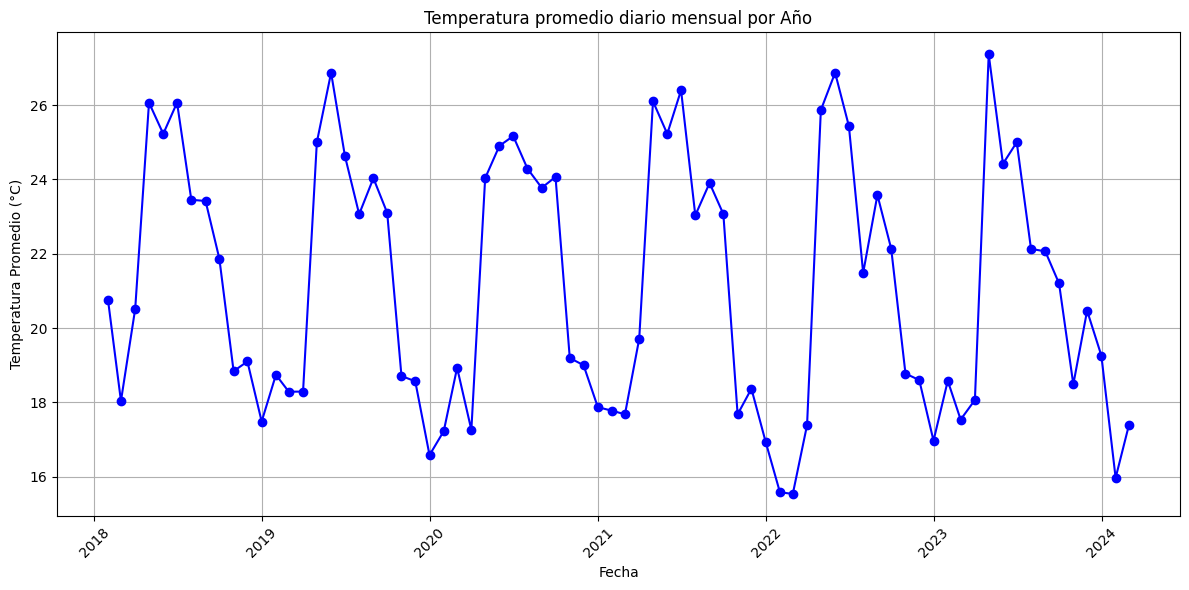

In [9]:
f_ver_temperaturas(datos['fecha'], datos['temperatura'])

## Matriz de correlación de las variables predictoras

Cuando hay mucha correlación lineal entre variables predictoras se considera que una variabe afecta a la otra por lo que es posible tomar la decisión de no considerar en el modelo alguna de ellas, finalmente se interpreta que una variable independiente afecta a otra variable independiente y ambas afectan a una variable dependiente.

En el caso de estas variables no hay correlaciones muy fuertes entre las variables independientes o predictoras.

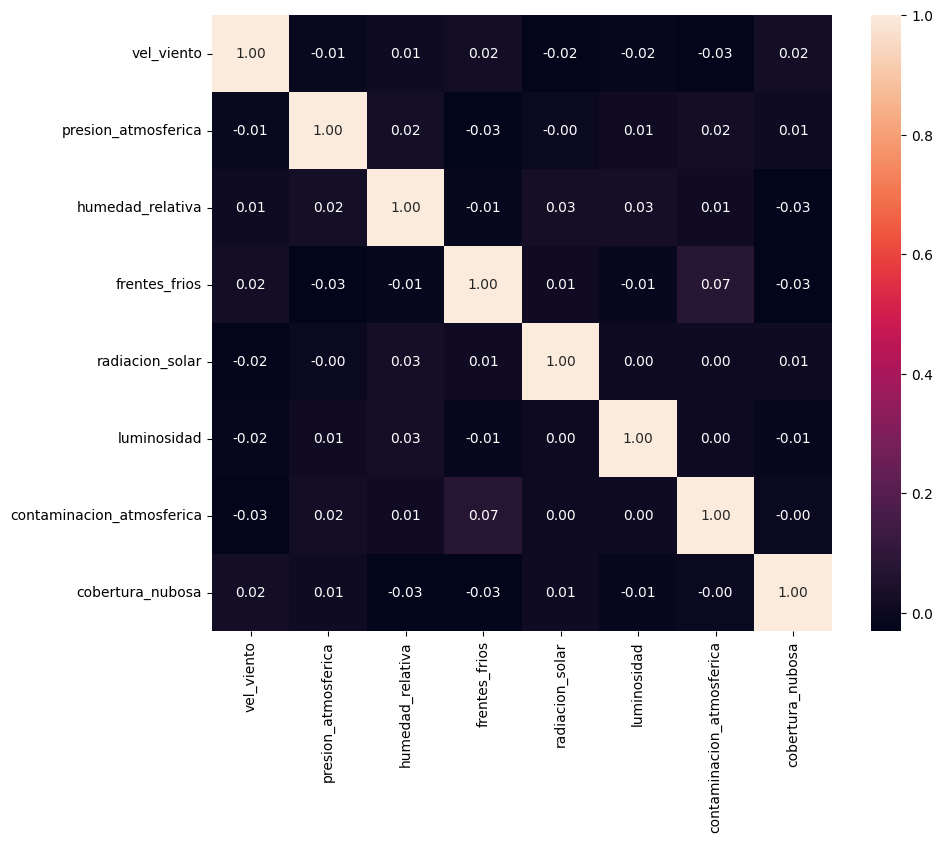

In [10]:
# Variables independientes excepto fecha y temperatura
variables_predictoras = datos.drop(columns=['fecha', 'temperatura'])
f_matriz_correlacion_variables(variables_predictoras)

## Crear datos de entrenamiento y validación

Los datos de entrenamiento son el 70% de los datos originales y los datos de validación son el 30%.

Con los datos de entrenamiento se construye el modelo de árboles de regresión.

Con los datos de validación se hacen prediccipnes y se evaluá el modelo.

In [11]:
# Preparar los datos para el modelo
X = datos.drop(columns=['fecha', 'temperatura'])  # Solo dejar las variables independientes o predictoras
y = datos['temperatura']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba o validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

f_visualizar_datos(X_train.sort_index().head(20), X_test.sort_index().head(20),
                   "Primeros registros. Datos de entrenamiento", "Primeros registros. Datos de validación")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Construye modelo

Se crea la variable llamada *modelo* con la construcción de un modelo de bosques aleatorios a través de la función *RandomForestRegressor*.

El parámetro *_estimators=100* especifica el número de árboles en el bosque. En este caso, significa que el modelo Random Forest se construirá con 100 árboles de decisión individuales.

El parámetros *random_state=2024* es una semilla para el generador de números aleatorios utilizado por el modelo *Random Forest*. Asegura que los resultados del modelo sean reproducibles.

In [12]:
arboles = 300 # Probar, 100, 200, 300, 400, 500

# Inicializar el modelo de regresión Random Forest
modelo = RandomForestRegressor(n_estimators=arboles, random_state=2024)

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=2024)

## Hacer predicciones

Con los datos de validación se hacen las predicciones.

In [13]:
# Hacer predicciones sobre el conjunto de validación
predicciones = modelo.predict(X_test)

## Evaluar el modelo

El coeficiente de determinación *RMSE* se utiliza como métrica para evaluar un modelo de regresión que significa que tanto se acercan las predicciones a los valores reales. Este valor debe ser comparado con otros modelos.

* *RMSE* o Coeficiente de Determinación:

$$
RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i-\hat{y})^2}{n}}
$$

$$
RMSE = \sqrt{\frac{\sum_{i=1}^{n}(real-predicciones)^2}{n}}
$$

El coeficiente *r squared ajusted* ajustado implica tomar este valor en cuenta porque existen diversos predictores o variables independientes que afectan a la variables dependiente en lgar de solo un predictor.

* *r squared* es el valor de la correlación $r^2$ al cuadrado.


Tanto *r squared* es el estadístico para valorar la explicación de la variable dependiente en relación a sus predictores o variables independientes.

In [14]:
# Calcular y mostrar el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2)


print ("Con ", arboles, " construídos en el modelo", "\n")
print('Mean Squared Error: MSE', metrics.mean_squared_error(y_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

r2 = r2_score(y_test, predicciones)

print(f"Coeficiente de Determinación (R^2) r squared: {r2:.2f}")

Con  300  construídos en el modelo 

Mean Squared Error: MSE 27.971876673260798
Root Mean Squared Error RMSE: 5.288844549924
Coeficiente de Determinación (R^2) r squared: 0.32


Para un modelo de *random forest* con 300 árboles, se tienen estos estadísticos:  

El valor de *RMSE* de 5.28 significa que tanto se desvían una predicción de los valores reales y debe ser comparado contra otros modelos para evaluar su eficiencia.

El valor de *r square* es aproximadamente 32% , aún así no supera la métrica del 50% establecida inicialmente, sin embargo también puede ser una métrica comparable contra otros modelos.

## Importancia de los predictores

La importancia de los predictores se mide en términos de cuánto mejora la predicción o la precisión del modelo al incluir la variable en el modelo.

En el contexto de un *Random Forest*, esto se calcula durante el proceso de entrenamiento del modelo y se basa en cuánto contribuye cada predictor a la reducción de la impureza (por ejemplo, la varianza en regresión o la entropía/gini en clasificación) en los nodos de los árboles que forman el bosque.

In [15]:
# Obtener la importancia de los predictores
importancias = modelo.feature_importances_

# Imprimir la importancia de cada predictor
for i, imp in enumerate(importancias):
    print(f"Importancia de {X_train.columns[i]}: {imp}")

Importancia de vel_viento: 0.14547636106136663
Importancia de presion_atmosferica: 0.12611681605624447
Importancia de humedad_relativa: 0.12302363109297958
Importancia de frentes_frios: 0.0973800037048284
Importancia de radiacion_solar: 0.13358416991163363
Importancia de luminosidad: 0.12769823102963557
Importancia de contaminacion_atmosferica: 0.1659431754226511
Importancia de cobertura_nubosa: 0.08077761172066057


Pudiera tomarse la decisión que aquellos predictores que no sobrepasen en importancia el 10% pueden eliminarse y recrear el modelo si esos predictores.

La idea detrás de esto es que al eliminar características con poca importancia, se puede reducir la complejidad del modelo, mejorar la velocidad de entrenamiento y, en algunos casos, aumentar la capacidad de generalización del modelo evitando el sobreajuste.

## Visualizar árbol de regresión



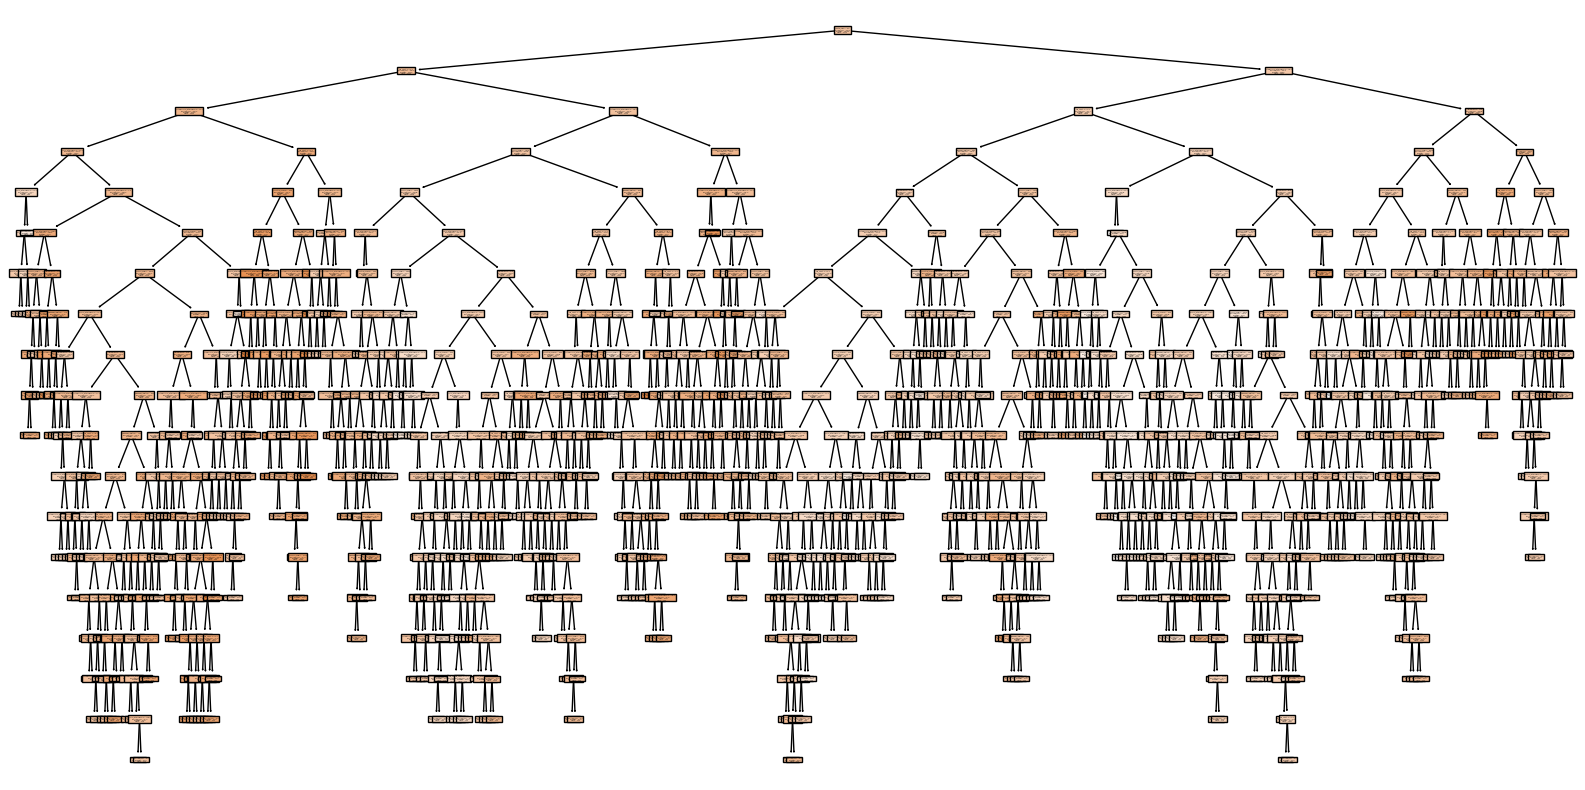

In [16]:
from sklearn import tree

# Selecciona un árbol específico para visualizar
# Por ejemplo, el primer árbol del bosque
chosen_tree = modelo.estimators_[0]

plt.figure(figsize=(20,10))
tree.plot_tree(chosen_tree,
               feature_names=X_train.columns,
               filled=True,
               precision=2,
               proportion=True)
plt.show()

## Reglas de asociación

Se construye reglas de asociación de un un árbol específico de *random forest*. Las reglas representan las condiciones que se deben dar para hacer una predicción.



In [17]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    """
    Outputs a decision tree model as a set of if-then-else rules.
    """

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

# Selecciona un árbol para extraer las reglas, por ejemplo, el primer árbol
chosen_tree = modelo.estimators_[0]

# Generar y mostrar las reglas del árbol seleccionado
tree_to_code(chosen_tree, X_train.columns)

  if frentes_frios <= 0.50:
    if vel_viento <= 27.50:
      if contaminacion_atmosferica <= 340.50:
        if presion_atmosferica <= 913.00:
          if presion_atmosferica <= 909.50:
            if luminosidad <= 54.00:
              if presion_atmosferica <= 903.00:
                return [[18.]]
              else:  # if presion_atmosferica > 903.00
                return [[20.]]
            else:  # if luminosidad > 54.00
              if humedad_relativa <= 38.50:
                return [[16.]]
              else:  # if humedad_relativa > 38.50
                return [[14.]]
          else:  # if presion_atmosferica > 909.50
            return [[9.]]
        else:  # if presion_atmosferica > 913.00
          if contaminacion_atmosferica <= 35.00:
            if presion_atmosferica <= 1002.00:
              if radiacion_solar <= 715.00:
                if vel_viento <= 23.50:
                  if cobertura_nubosa <= 61.00:
                    if vel_viento <= 20.50:
           

Son muchas reglas de asociaición pero se entiende que la decisión es basada en la ramificación del árbol específico elegido a representar.






## Predicción con nevos valores



In [18]:
# Valores de un nuevo registro

v_vel_viento = 38 # x1
v_presion_atmosferica = 950 # x2
v_humedad_relativa = 80     # x3
v_frentes_frios = 0         # x4
v_radiacion_solar = 350     # x5
v_luminosidad = 50          # x6
v_contaminacion_atmosferica = 150  # x7
v_cobertura_nubosa = 20 # x8


nuevo = np.array([[v_vel_viento,
                   v_presion_atmosferica,
                   v_humedad_relativa,
                   v_frentes_frios,
                   v_radiacion_solar,
                   v_luminosidad,
                   v_contaminacion_atmosferica,
                   v_cobertura_nubosa]])

# El modelo está ya entrenado y 'nuevo_registro' es el array de NumPy para la predicción
nombres_variables = ['vel_viento', 'presion_atmosferica', 'humedad_relativa', 'frentes_frios', 'radiacion_solar', 'luminosidad', 'contaminacion_atmosferica', 'cobertura_nubosa']

# Convertir el array de NumPy a un DataFrame de pandas con los nombres de las columnas correctos
nuevo_registro_df = pd.DataFrame(nuevo, columns=nombres_variables)

prediccion_temperatura = modelo.predict(nuevo_registro_df )

# y_pred contiene la predicción del modelo para la entrada dada
print("Predicción con registro pandas DataFrame:", prediccion_temperatura[0])

Predicción con registro pandas DataFrame: 18.033333333333335


# Interpretación

Comparado con otros modelos:


* Modelo de regresión múltiple; estadístico *RMSE* de 5.35; *r squared* aproximado del 30%. https://colab.research.google.com/drive/1bV87TeRbxCEt1LrM565oQ6a84aSDPACF?usp=sharing



* Arbol de regresión con profunidad = 3; RMSE 5.58; *r squared* aproximadamente 24%. https://colab.research.google.com/drive/1sn8CGl4yGHI6YrjhAJZkdCdSVCoWAmFb?usp=sharing

* *Random Forest* con 300 árboles; *RMSE* de 5.28; *r squared* es aproximadamente de 32%

Con el mismo conjunto de datos, los mismos registros para datos de entrenamiento y datos de validación, el mejor modelo en términos de eficiencia midiendo y comparando el estadístico *RMSE* ha sido el *random forest*.

La predicción promedio con los datos nuevos, usando el modelo de regresión *random forest* con 300 árboles, este predice una temperatura de 18.03 grados.

Habiendo establecido como métrica el 50% en valor de *r squared* en todos los modelos de regresión, ninguno de ellos supera esa medida establecida, si embargo no significa que sean malos, simplemente no cumplen con esa métrica estabecida, ahora si que depende contra qué se mida.

Se puede modificar la métrica y decir que si supera el 30% es aceptable, con ello dos de estos modelos superan esa métrica.